In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2023-04-10 21:01:20--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1,4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1,36M  6,51MB/s    in 0,2s    

2023-04-10 21:01:21 (6,51 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [81]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import matplotlib.pyplot as plt

In [49]:
df = pd.read_csv("housing.csv")

In [50]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [51]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [15]:
list(df)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

In [16]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [17]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(0)

In [18]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

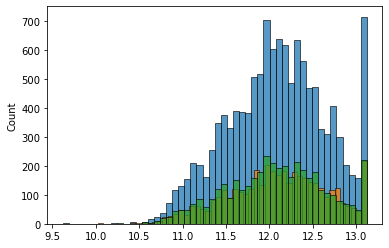

In [24]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

# Transform the output to the log scale
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values) 

sns.histplot(y_train, bins=50)
sns.histplot(y_val, bins=50)
sns.histplot(y_test, bins=50)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

dv = DictVectorizer(sparse=False)

categorical = ['ocean_proximity']
numerical  = ['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [27]:
regressor = DecisionTreeRegressor(max_depth=1)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [30]:
print(export_text(regressor, feature_names=dv.get_feature_names()))

|--- ocean_proximity=INLAND <= 0.50
|   |--- value: [12.31]
|--- ocean_proximity=INLAND >  0.50
|   |--- value: [11.61]



/Users/manojkl/pytorch-test/ML/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Question 1

Let's train a decision tree regressor to predict the `median_house_value` variable. 

* Train a model with `max_depth=1`.


Which feature is used for splitting the data?

* `ocean_proximity=INLAND`
* `total_rooms`
* `latitude`
* `population`

### Ans = `ocean_proximity=INLAND`

In [32]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [33]:
est = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
est.fit(X_train, y_train)

y_pred = est.predict(X_val)
rmse(y_val, y_pred)

0.24579193759466622

## Question 2

Train a random forest model with these parameters:

* `n_estimators=10`
* `random_state=1`
* `n_jobs=-1`  (optional - to make training faster)


What's the RMSE of this model on validation?

* 0.05
* 0.25
* 0.55
* 0.85

## Ans = 0.25

In [36]:
np.arange(10, 201, 10)

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200])

In [44]:
n_estimator = np.arange(10, 201, 10)

root_mean_square_error = []

for i in n_estimator:
    est = RandomForestRegressor(n_estimators=i, random_state=1, n_jobs=-1)
    est.fit(X_train, y_train)

    y_pred = est.predict(X_val)
    print("%s --> %f"%(i, rmse(y_val, y_pred)))

10 --> 0.245792
20 --> 0.239150
30 --> 0.235651
40 --> 0.234542
50 --> 0.233054
60 --> 0.232915
70 --> 0.232499
80 --> 0.232567
90 --> 0.232220
100 --> 0.231943
110 --> 0.231484
120 --> 0.231602
130 --> 0.231705
140 --> 0.231682
150 --> 0.231713
160 --> 0.231673
170 --> 0.231609
180 --> 0.231781
190 --> 0.231788
200 --> 0.231663


In [83]:
n_estimator = np.arange(10, 201, 10)
scores = []
root_mean_square_error = []

for i in n_estimator:
    est = RandomForestRegressor(n_estimators=i, random_state=1, n_jobs=-1)
    est.fit(X_train, y_train)

    y_pred = est.predict(X_val)
    scores.append((i, np.sqrt(mean_squared_error(y_val, y_pred))))
    print("%s --> %f"%(i, rmse(y_val, y_pred)))

10 --> 0.245792
20 --> 0.239150
30 --> 0.235651
40 --> 0.234542
50 --> 0.233054
60 --> 0.232915
70 --> 0.232499
80 --> 0.232567
90 --> 0.232220
100 --> 0.231943
110 --> 0.231484
120 --> 0.231602
130 --> 0.231705
140 --> 0.231682
150 --> 0.231713
160 --> 0.231673
170 --> 0.231609
180 --> 0.231781
190 --> 0.231788
200 --> 0.231663


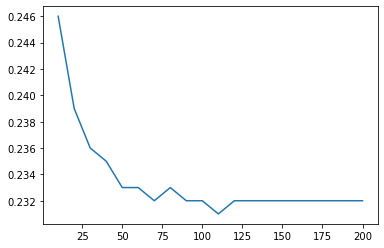

In [84]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])
plt.plot(df_scores.n_estimators, df_scores.rmse.round(3))
plt.show()

## Question 3

Now let's experiment with the `n_estimators` parameter

* Try different values of this parameter from 10 to 200 with step 10.
* Set `random_state` to `1`.
* Evaluate the model on the validation dataset.


After which value of `n_estimators` does RMSE stop improving?

- 10
- 50
- 70
- 150

## Ans = 70

In [45]:
max_depth = [10, 15, 20, 25]
n_estimator = np.arange(10, 201, 10)
scores = []

for i in max_depth:
    for j in n_estimator:
        est = RandomForestRegressor(n_estimators=j, max_depth=i, random_state=1, n_jobs=-1)
        est.fit(X_train, y_train)

        y_pred = est.predict(X_val)
        print("%s, %s --> %f"%(i,j, rmse(y_val, y_pred)))
        scores.append((i,j, rmse(y_val, y_pred)))

columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
        

10, 10 --> 0.254601
10, 20 --> 0.252599
10, 30 --> 0.251514
10, 40 --> 0.250963
10, 50 --> 0.250117
10, 60 --> 0.250036
10, 70 --> 0.249873
10, 80 --> 0.249585
10, 90 --> 0.249310
10, 100 --> 0.249153
10, 110 --> 0.248919
10, 120 --> 0.248984
10, 130 --> 0.249113
10, 140 --> 0.249219
10, 150 --> 0.249205
10, 160 --> 0.249127
10, 170 --> 0.248922
10, 180 --> 0.249030
10, 190 --> 0.249103
10, 200 --> 0.249125
15, 10 --> 0.244782
15, 20 --> 0.239433
15, 30 --> 0.237022
15, 40 --> 0.236160
15, 50 --> 0.234899
15, 60 --> 0.234798
15, 70 --> 0.234227
15, 80 --> 0.234049
15, 90 --> 0.233857
15, 100 --> 0.233646
15, 110 --> 0.233265
15, 120 --> 0.233340
15, 130 --> 0.233431
15, 140 --> 0.233362
15, 150 --> 0.233300
15, 160 --> 0.233227
15, 170 --> 0.233206
15, 180 --> 0.233351
15, 190 --> 0.233423
15, 200 --> 0.233347
20, 10 --> 0.245820
20, 20 --> 0.239058
20, 30 --> 0.235980
20, 40 --> 0.235093
20, 50 --> 0.233606
20, 60 --> 0.233397
20, 70 --> 0.232900
20, 80 --> 0.232831
20, 90 --> 0.23258

In [46]:
df_scores.sort_values(by=['auc'])

,max_depth,n_estimators,auc
70,25,110,0.231179
71,25,120,0.231206
73,25,140,0.231378
79,25,200,0.231437
76,25,170,0.231449
...,...,...,...
4,10,50,0.250117
3,10,40,0.250963
2,10,30,0.251514
1,10,20,0.252599


## Question 4

Let's select the best `max_depth`:

* Try different values of `max_depth`: `[10, 15, 20, 25]`
* For each of these values, try different values of `n_estimators` from 10 till 200 (with step 10)
* Fix the random seed: `random_state=1`


What's the best `max_depth`:

* 10
* 15
* 20
* 25

## Ans = 25

In [85]:
est = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)
est.fit(X_train, y_train)

est.feature_importances_
# y_pred = est.predict(X_val)
# rmse(y_val, y_pred)

array([1.61407558e-02, 3.31967386e-02, 1.01333351e-01, 9.63405488e-02,
       3.63224176e-01, 2.76524800e-03, 3.10900842e-01, 3.56806263e-04,
       4.52770519e-04, 4.45219202e-03, 3.09988869e-02, 1.93726028e-02,
       2.04650818e-02])

In [86]:
a =max([1.61407558e-02, 3.31967386e-02, 1.01333351e-01, 9.63405488e-02,
       3.63224176e-01, 2.76524800e-03, 3.10900842e-01, 3.56806263e-04,
       4.52770519e-04, 4.45219202e-03, 3.09988869e-02, 1.93726028e-02,
       2.04650818e-02])
a

0.363224176

In [88]:
#@ INSPECTING FEATURE IMPORTANCES:
df_importances = pd.DataFrame()
df_importances['feature'] = dv.feature_names_
df_importances['importance'] = est.feature_importances_
df_importances

,feature,importance
0,households,0.016141
1,housing_median_age,0.033197
2,latitude,0.101333
3,longitude,0.096341
4,median_income,0.363224
5,ocean_proximity=<1H OCEAN,0.002765
6,ocean_proximity=INLAND,0.310901
7,ocean_proximity=ISLAND,0.000357
8,ocean_proximity=NEAR BAY,0.000453
9,ocean_proximity=NEAR OCEAN,0.004452


In [ ]:
['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 <1H OCEAN     
INLAND        
NEAR OCEAN    
NEAR BAY      
ISLAND     
 ]

# Question 5

We can extract feature importance information from tree-based models. 

At each step of the decision tree learning algorith, it finds the best split. 
When doint it, we can calculate "gain" - the reduction in impurity before and after the split. 
This gain is quite useful in understanding what are the imporatant features 
for tree-based models.

In Scikit-Learn, tree-based models contain this information in the
[`feature_importances_`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.feature_importances_)
field. 

For this homework question, we'll find the most important feature:

* Train the model with these parametes:
    * `n_estimators=10`,
    * `max_depth=20`,
    * `random_state=1`,
    * `n_jobs=-1` (optional)
* Get the feature importance information from this model


What's the most important feature? 

* `total_rooms`
* `median_income`	
* `total_bedrooms`
* `longitude`

## Ans = `median_income`

In [60]:
# dv.get_feature_names()

feature = ['households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity=1H_OCEAN',
 'ocean_proximity=INLAND',
 'ocean_proximity=ISLAND',
 'ocean_proximity=NEAR_BAY',
 'ocean_proximity=NEAR_OCEAN',
 'population',
 'total_bedrooms',
 'total_rooms']

In [68]:
scores = {}

# features = dv.get_feature_names()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=feature)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=feature)

watchlist = [(dtrain, 'train'), (dval, 'val')]

In [72]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=101,
                  verbose_eval=5,
                  evals=watchlist)

In [63]:
s = output.stdout

In [64]:
print(s[:200])

[0]	train-rmse:8.12733	val-rmse:8.13232
[5]	train-rmse:1.40154	val-rmse:1.40605
[10]	train-rmse:0.33762	val-rmse:0.35337
[15]	train-rmse:0.22493	val-rmse:0.25306
[20]	train-rmse:0.20596	val-rmse:0.240


In [70]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_rmse', 'val_rmse']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [73]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.1'

In [66]:
df_score = parse_xgb_output(output)

In [67]:
df_score

,num_iter,train_rmse,val_rmse
0,0,8.12733,8.13232
1,5,1.40154,1.40605
2,10,0.33762,0.35337
3,15,0.22493,0.25306
4,20,0.20596,0.24074
5,25,0.19729,0.23785
6,30,0.19027,0.23540
7,35,0.18405,0.23375
8,40,0.17892,0.23185
9,45,0.17184,0.23031


In [79]:
scores['eta=0.1'].iloc[-1]

num_iter      100.00000
train_rmse      0.18306
val_rmse        0.23006
Name: 20, dtype: float64

In [78]:
scores['eta=0.3'].iloc[-1]

num_iter      100.00000
train_rmse      0.13307
val_rmse        0.22710
Name: 20, dtype: float64

## Question 6

Now let's train an XGBoost model! For this question, we'll tune the `eta` parameter:

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:

```
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
```

Now change `eta` from `0.3` to `0.1`.

Which eta leads to the best RMSE score on the validation dataset?

* 0.3
* 0.1
* Both gives same

## Ans = Both gives same 